In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("Credit_Risk_PD_Model_Dataset.csv")
df.shape

(622, 39)

In [5]:
df.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,LONG_TERM_DEBT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,NON_CURRENT_LIABILITIES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,Long_Term_Debt_to_Equity_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773.0,NaN,476381,516192,78247.0,357842.0,1953656.0,2527734.0,59291.0,1101146.0,1953654.0,150315.0,1.0,121478.0,1101146.0,812561.0,2430037.0,1360855.0,NaN,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.3549,1.4356,0.6656,0.2630,6.0353,0.6932,0.1332,0.9229,0.8626,0.1960,NaN,5.9466,-0.0501,0.0
1,EduArtsHealthSocial,18593.0,11753,21913,257405,6988.0,42274.0,668688.0,124057.0,6456.0,NaN,609921.0,28829.0,58767.0,NaN,NaN,433195.0,690600.0,255496.0,NaN,135810.0,-235493.0,0.6824,1.6829,0.6273,NaN,2.3872,0.3727,0.1655,6.5479,0.1642,0.0269,0.0851,NaN,0.0317,91.3457,21.2275,-0.0472,0.0
2,Retail,202720.0,3420276,665190,373352,76899.0,406223.0,542187.0,1577802.0,11742.0,205530.0,520062.0,272950.0,22124.0,71143.0,282894.0,551127.0,1207376.0,337678.0,318856.0,4998079.0,291837.0,0.6383,0.8398,0.4565,0.3729,1.5401,0.5435,1.2030,34.5947,1.0880,0.1679,1.7817,0.7335,0.5509,31.5682,5.4611,-0.3119,1.0
3,Agriculture - Other,87515.0,7905311,1820195,2153519,702651.0,675750.0,7409750.0,3242324.0,88218.0,2684192.0,7409681.0,-115120.0,0.0,495837.0,6239035.0,837370.0,9229945.0,3524366.0,539592.0,11147635.0,-333324.0,4.2087,0.0998,0.0907,3.2054,2.1024,0.9093,0.1917,7.6600,0.3138,0.0095,0.8452,0.2709,0.1972,29.0853,-1.0327,-0.0209,0.0
4,EduArtsHealthSocial,272938.0,237933,381958,681622,NaN,-515748.0,7395426.0,540762.0,179654.0,3418577.0,7395426.0,-695403.0,0.0,84294.0,7937407.0,-855472.0,7777384.0,3418577.0,NaN,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,-4.0618,2.1633,1.1082,-0.1509,-2.8708,-0.7566,0.0351,0.5604,0.5241,0.0491,69.4446,-89.3035,-0.0241,0.0


### Checking for missing values

In [6]:
df.isna().sum().sort_values(ascending=False)

Long_Term_Debt_to_Equity_1            263
LONG_TERM_DEBT_1                      263
NON_CURRENT_LIABILITIES_1             173
Liquidity_Ratio_1                     147
NET_TRADE_RECV_1                      147
INTEREST_EXPENSE_1                    142
EBITDA_to_Interest_1                  142
TOTAL_INVENTORY_1                     141
NetFixedAssets_to_TotalDebt_1         107
Gross_Margin_perc_1                   104
TOTAL_DEBT_1                           95
EBITDA_to_total_Debt_1                 95
Debt_to_TNW_1                          95
DEPRECIATION_1                         88
NET_FIXED_ASSETS_1                     67
COST_OF_GOODS_SOLD_1                   66
FIXED_AND_NON_CURRENT_ASSETS_1         61
Total_Liab_to_Total_Assets_2_1         60
Curr_to_Total_Assets_1                 49
Current_Ratio_1                        49
Net_Income_Margin_1                    49
Cash_to_Total_assets_1                 49
EBITDA_to_curr_liab_1                  49
Total_Liab_to_Total_Assets_1      

### Deleting columns for which more than 20% data is missing

In [7]:
df.drop('Long_Term_Debt_to_Equity_1', axis = 1,inplace = True)
df.drop('LONG_TERM_DEBT_1', axis = 1,inplace = True)
df.drop('NON_CURRENT_LIABILITIES_1', axis = 1,inplace = True)
df.drop('Liquidity_Ratio_1', axis = 1,inplace = True)
df.drop('NET_TRADE_RECV_1', axis = 1,inplace = True)
df.drop('INTEREST_EXPENSE_1', axis = 1,inplace = True)
df.drop('EBITDA_to_Interest_1', axis = 1,inplace = True)
df.drop('TOTAL_INVENTORY_1', axis = 1,inplace = True)

In [8]:
df.isna().sum().sort_values(ascending=False)

NetFixedAssets_to_TotalDebt_1         107
Gross_Margin_perc_1                   104
Debt_to_TNW_1                          95
TOTAL_DEBT_1                           95
EBITDA_to_total_Debt_1                 95
DEPRECIATION_1                         88
NET_FIXED_ASSETS_1                     67
COST_OF_GOODS_SOLD_1                   66
FIXED_AND_NON_CURRENT_ASSETS_1         61
Total_Liab_to_Total_Assets_2_1         60
Curr_to_Total_Assets_1                 49
Equity_to_Assets_1                     49
Current_Ratio_1                        49
Cash_to_Total_assets_1                 49
EBITDA_to_curr_liab_1                  49
Net_Income_Margin_1                    49
Total_Liab_to_Total_Assets_1           49
TURNOVER_1                             49
Default                                49
Equity_to_Liability_1                  49
WORKING_CAPITAL_1                      49
CASH_AND_CASH_EQUIVALENTS_floored1     49
TOTAL_ASSETS_1                         49
RETAINED_EARNINGS_1               

In [9]:
df.dtypes

Industry                               object
CASH_AND_CASH_EQUIVALENTS_floored1    float64
COST_OF_GOODS_SOLD_1                   object
CURRENT_ASSETS_1                       object
CURRENT_LIABILITIES_1                  object
DEPRECIATION_1                        float64
EBITDA_1                              float64
FIXED_AND_NON_CURRENT_ASSETS_1        float64
GROSS_PROFIT_1                        float64
NET_FIXED_ASSETS_1                    float64
NET_INCOME_1                          float64
NET_INTANGIBLES_1                     float64
RETAINED_EARNINGS_1                   float64
TOTAL_ASSETS_1                        float64
TOTAL_DEBT_1                          float64
TURNOVER_1                            float64
WORKING_CAPITAL_1                     float64
Debt_to_TNW_1                         float64
Equity_to_Liability_1                 float64
Equity_to_Assets_1                    float64
NetFixedAssets_to_TotalDebt_1         float64
Total_Liab_to_Total_Assets_1      

### Converting non-numeric columns that should be numeric to numeric colums

In [10]:
df[["COST_OF_GOODS_SOLD_1", "CURRENT_ASSETS_1","CURRENT_LIABILITIES_1"]] = df[["COST_OF_GOODS_SOLD_1", "CURRENT_ASSETS_1","CURRENT_LIABILITIES_1"]].apply(pd.to_numeric,errors='coerce')


In [11]:
df.dtypes

Industry                               object
CASH_AND_CASH_EQUIVALENTS_floored1    float64
COST_OF_GOODS_SOLD_1                  float64
CURRENT_ASSETS_1                      float64
CURRENT_LIABILITIES_1                 float64
DEPRECIATION_1                        float64
EBITDA_1                              float64
FIXED_AND_NON_CURRENT_ASSETS_1        float64
GROSS_PROFIT_1                        float64
NET_FIXED_ASSETS_1                    float64
NET_INCOME_1                          float64
NET_INTANGIBLES_1                     float64
RETAINED_EARNINGS_1                   float64
TOTAL_ASSETS_1                        float64
TOTAL_DEBT_1                          float64
TURNOVER_1                            float64
WORKING_CAPITAL_1                     float64
Debt_to_TNW_1                         float64
Equity_to_Liability_1                 float64
Equity_to_Assets_1                    float64
NetFixedAssets_to_TotalDebt_1         float64
Total_Liab_to_Total_Assets_1      

In [12]:
df.isna().sum()

Industry                               41
CASH_AND_CASH_EQUIVALENTS_floored1     49
COST_OF_GOODS_SOLD_1                  104
CURRENT_ASSETS_1                       49
CURRENT_LIABILITIES_1                  49
DEPRECIATION_1                         88
EBITDA_1                               49
FIXED_AND_NON_CURRENT_ASSETS_1         61
GROSS_PROFIT_1                         49
NET_FIXED_ASSETS_1                     67
NET_INCOME_1                           49
NET_INTANGIBLES_1                      49
RETAINED_EARNINGS_1                    49
TOTAL_ASSETS_1                         49
TOTAL_DEBT_1                           95
TURNOVER_1                             49
WORKING_CAPITAL_1                      49
Debt_to_TNW_1                          95
Equity_to_Liability_1                  49
Equity_to_Assets_1                     49
NetFixedAssets_to_TotalDebt_1         107
Total_Liab_to_Total_Assets_1           49
EBITDA_to_total_Debt_1                 95
EBITDA_to_curr_liab_1             

### Dropping rows for which the dependent variable info is missing

In [13]:
df.drop(df.loc[df.Default.isna()].index, inplace=True) 

In [14]:
df.isna().sum()

Industry                               0
CASH_AND_CASH_EQUIVALENTS_floored1     0
COST_OF_GOODS_SOLD_1                  55
CURRENT_ASSETS_1                       0
CURRENT_LIABILITIES_1                  0
DEPRECIATION_1                        39
EBITDA_1                               0
FIXED_AND_NON_CURRENT_ASSETS_1        12
GROSS_PROFIT_1                         0
NET_FIXED_ASSETS_1                    18
NET_INCOME_1                           0
NET_INTANGIBLES_1                      0
RETAINED_EARNINGS_1                    0
TOTAL_ASSETS_1                         0
TOTAL_DEBT_1                          46
TURNOVER_1                             0
WORKING_CAPITAL_1                      0
Debt_to_TNW_1                         46
Equity_to_Liability_1                  0
Equity_to_Assets_1                     0
NetFixedAssets_to_TotalDebt_1         58
Total_Liab_to_Total_Assets_1           0
EBITDA_to_total_Debt_1                46
EBITDA_to_curr_liab_1                  0
Cash_to_Total_as

In [15]:
df.Default.value_counts()

0.0    511
1.0     62
Name: Default, dtype: int64

### Splitting independent and dependent variables

In [16]:
X = df.loc[:,df.columns != 'Default']
X.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1
0,Wholesale,323773.0,NaN,476381.0,516192.0,78247.0,357842.0,1953656.0,2527734.0,1953654.0,150315.0,1.0,812561.0,2430037.0,1360855.0,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.4356,0.6656,0.2630,0.6932,0.1332,0.9229,0.1960,NaN,5.9466,-0.0501
1,EduArtsHealthSocial,18593.0,11753.0,21913.0,257405.0,6988.0,42274.0,668688.0,124057.0,609921.0,28829.0,58767.0,433195.0,690600.0,255496.0,135810.0,-235493.0,0.6824,1.6829,0.6273,2.3872,0.3727,0.1655,0.1642,0.0269,0.0851,0.0317,91.3457,21.2275,-0.0472
2,Retail,202720.0,3420276.0,665190.0,373352.0,76899.0,406223.0,542187.0,1577802.0,520062.0,272950.0,22124.0,551127.0,1207376.0,337678.0,4998079.0,291837.0,0.6383,0.8398,0.4565,1.5401,0.5435,1.2030,1.0880,0.1679,1.7817,0.5509,31.5682,5.4611,-0.3119
3,Agriculture - Other,87515.0,7905311.0,1820195.0,2153519.0,702651.0,675750.0,7409750.0,3242324.0,7409681.0,-115120.0,0.0,837370.0,9229945.0,3524366.0,11147635.0,-333324.0,4.2087,0.0998,0.0907,2.1024,0.9093,0.1917,0.3138,0.0095,0.8452,0.1972,29.0853,-1.0327,-0.0209
4,EduArtsHealthSocial,272938.0,237933.0,381958.0,681622.0,NaN,-515748.0,7395426.0,540762.0,7395426.0,-695403.0,0.0,-855472.0,7777384.0,3418577.0,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,2.1633,1.1082,-0.1509,-0.7566,0.0351,0.5604,0.0491,69.4446,-89.3035,-0.0241


In [17]:
y=df.Default
y

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
568    0.0
569    0.0
570    0.0
571    0.0
572    0.0
Name: Default, Length: 573, dtype: float64

### Missing value imputation with MEAN

In [18]:
numeric_features = X.loc[:,X.columns != 'Industry']
numeric_features

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1
0,323773.0,NaN,476381.0,516192.0,78247.0,357842.0,1953656.0,2527734.0,1953654.0,150315.0,1.0,812561.0,2430037.0,1360855.0,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.4356,0.6656,0.2630,0.6932,0.1332,0.9229,0.1960,NaN,5.9466,-0.0501
1,18593.0,11753.0,21913.0,257405.0,6988.0,42274.0,668688.0,124057.0,609921.0,28829.0,58767.0,433195.0,690600.0,255496.0,135810.0,-235493.0,0.6824,1.6829,0.6273,2.3872,0.3727,0.1655,0.1642,0.0269,0.0851,0.0317,91.3457,21.2275,-0.0472
2,202720.0,3420276.0,665190.0,373352.0,76899.0,406223.0,542187.0,1577802.0,520062.0,272950.0,22124.0,551127.0,1207376.0,337678.0,4998079.0,291837.0,0.6383,0.8398,0.4565,1.5401,0.5435,1.2030,1.0880,0.1679,1.7817,0.5509,31.5682,5.4611,-0.3119
3,87515.0,7905311.0,1820195.0,2153519.0,702651.0,675750.0,7409750.0,3242324.0,7409681.0,-115120.0,0.0,837370.0,9229945.0,3524366.0,11147635.0,-333324.0,4.2087,0.0998,0.0907,2.1024,0.9093,0.1917,0.3138,0.0095,0.8452,0.1972,29.0853,-1.0327,-0.0209
4,272938.0,237933.0,381958.0,681622.0,NaN,-515748.0,7395426.0,540762.0,7395426.0,-695403.0,0.0,-855472.0,7777384.0,3418577.0,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,2.1633,1.1082,-0.1509,-0.7566,0.0351,0.5604,0.0491,69.4446,-89.3035,-0.0241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,-644364.0,697805.0,12553.0,300890.0,14941.0,91787.0,1437016.0,346296.0,1082147.0,37084.0,0.0,180404.0,1449568.0,924723.0,1044100.0,-288338.0,5.1219,0.1423,0.1245,1.1702,0.8755,0.0993,0.3051,0.0000,0.0417,0.0087,33.1669,3.5518,0.0347
569,218475.0,2096257.0,1681430.0,1158749.0,501940.0,1458807.0,2324411.0,2479280.0,2324411.0,651278.0,0.0,1248628.0,4005841.0,1931709.0,4575536.0,522681.0,1.2222,0.6517,0.3945,1.2033,0.6055,0.7552,1.2589,0.0545,1.4511,0.4197,54.1856,14.2339,-0.2275
570,-644364.0,1021599.0,434062.0,403682.0,NaN,-49656.0,3676732.0,469607.0,3673379.0,-83061.0,3353.0,2500324.0,4110794.0,336502.0,1491206.0,30381.0,0.1348,1.5525,0.6082,10.9164,0.3918,-0.1476,-0.1230,0.0000,1.0753,0.1056,31.4918,-5.5700,-0.0498
571,46560.0,43181.0,76262.0,61404.0,1337.0,152115.0,242078.0,440033.0,242078.0,150778.0,0.0,140401.0,318339.0,145912.0,483213.0,14858.0,1.0393,0.7890,0.4410,1.6591,0.5590,1.0425,2.4773,0.1463,1.2420,0.2396,91.0639,31.2033,0.0374


In [19]:
 for i in numeric_features:
    X.loc[X.loc[:,i].isna(),i]=X.loc[:,i].mean()

In [20]:
X.isna().sum()

Industry                              0
CASH_AND_CASH_EQUIVALENTS_floored1    0
COST_OF_GOODS_SOLD_1                  0
CURRENT_ASSETS_1                      0
CURRENT_LIABILITIES_1                 0
DEPRECIATION_1                        0
EBITDA_1                              0
FIXED_AND_NON_CURRENT_ASSETS_1        0
GROSS_PROFIT_1                        0
NET_FIXED_ASSETS_1                    0
NET_INCOME_1                          0
NET_INTANGIBLES_1                     0
RETAINED_EARNINGS_1                   0
TOTAL_ASSETS_1                        0
TOTAL_DEBT_1                          0
TURNOVER_1                            0
WORKING_CAPITAL_1                     0
Debt_to_TNW_1                         0
Equity_to_Liability_1                 0
Equity_to_Assets_1                    0
NetFixedAssets_to_TotalDebt_1         0
Total_Liab_to_Total_Assets_1          0
EBITDA_to_total_Debt_1                0
EBITDA_to_curr_liab_1                 0
Cash_to_Total_assets_1                0


### Checking Correlation between independent features using heatmap

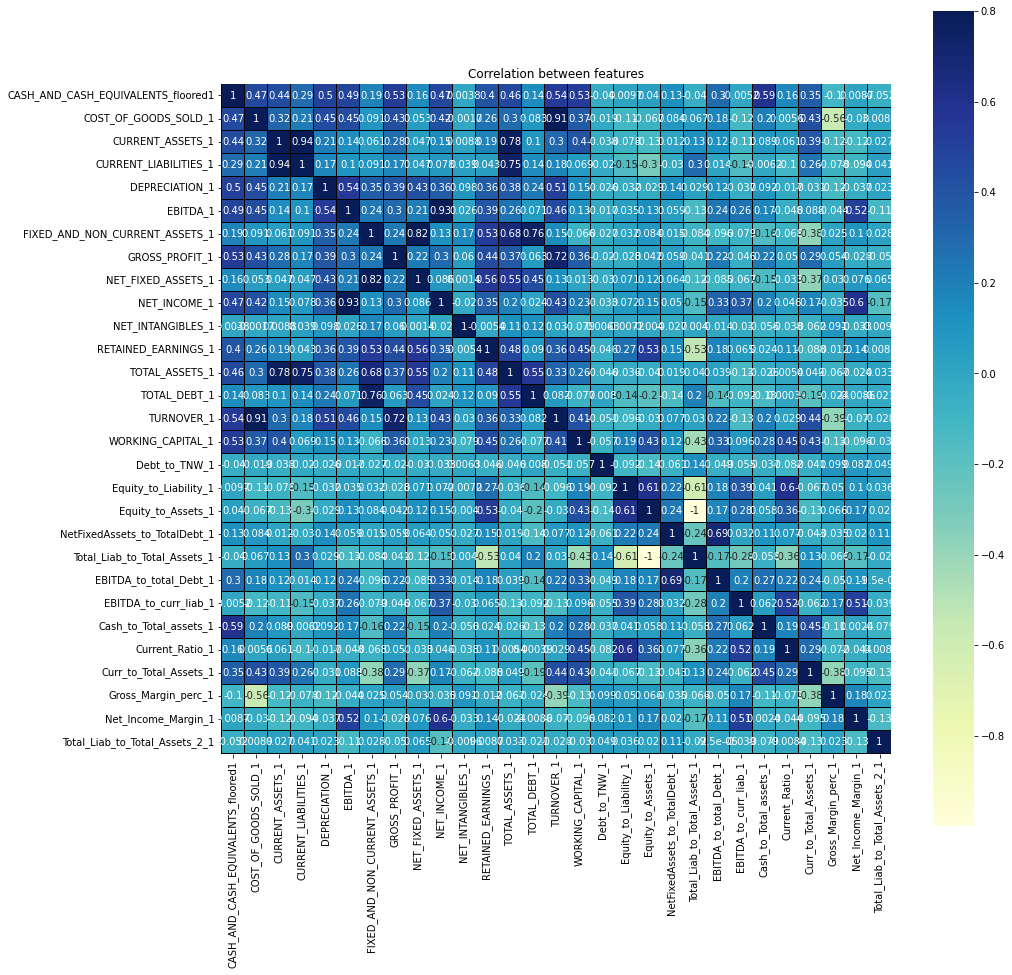

In [21]:
corr = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')
plt.show()

### Selecting features after inspecting the correlation heat map for further exploratory data analysis

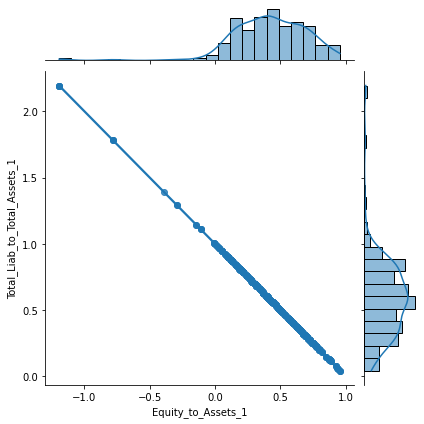

In [22]:
sns.jointplot('Equity_to_Assets_1','Total_Liab_to_Total_Assets_1', data=X, kind='reg');

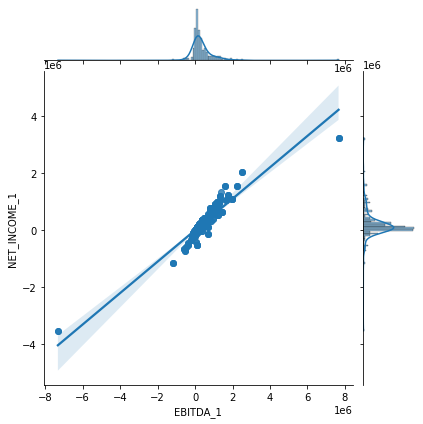

In [23]:
sns.jointplot('EBITDA_1','NET_INCOME_1', data=X, kind='reg');

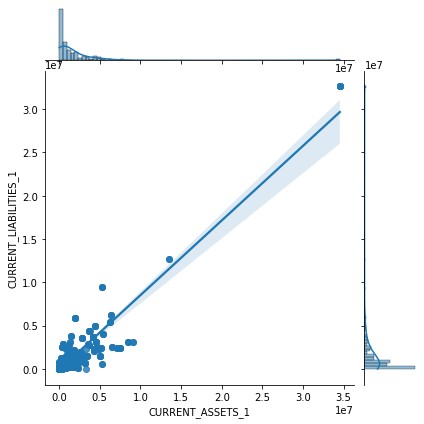

In [24]:
sns.jointplot('CURRENT_ASSETS_1','CURRENT_LIABILITIES_1', data=X, kind='reg');

In [25]:
X.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1
0,Wholesale,323773.0,2.418543e+06,476381.0,516192.0,78247.000000,357842.0,1953656.0,2527734.0,1953654.0,150315.0,1.0,812561.0,2430037.0,1360855.0,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.4356,0.6656,0.2630,0.6932,0.1332,0.9229,0.1960,43.999986,5.9466,-0.0501
1,EduArtsHealthSocial,18593.0,1.175300e+04,21913.0,257405.0,6988.000000,42274.0,668688.0,124057.0,609921.0,28829.0,58767.0,433195.0,690600.0,255496.0,135810.0,-235493.0,0.6824,1.6829,0.6273,2.3872,0.3727,0.1655,0.1642,0.0269,0.0851,0.0317,91.345700,21.2275,-0.0472
2,Retail,202720.0,3.420276e+06,665190.0,373352.0,76899.000000,406223.0,542187.0,1577802.0,520062.0,272950.0,22124.0,551127.0,1207376.0,337678.0,4998079.0,291837.0,0.6383,0.8398,0.4565,1.5401,0.5435,1.2030,1.0880,0.1679,1.7817,0.5509,31.568200,5.4611,-0.3119
3,Agriculture - Other,87515.0,7.905311e+06,1820195.0,2153519.0,702651.000000,675750.0,7409750.0,3242324.0,7409681.0,-115120.0,0.0,837370.0,9229945.0,3524366.0,11147635.0,-333324.0,4.2087,0.0998,0.0907,2.1024,0.9093,0.1917,0.3138,0.0095,0.8452,0.1972,29.085300,-1.0327,-0.0209
4,EduArtsHealthSocial,272938.0,2.379330e+05,381958.0,681622.0,95440.102996,-515748.0,7395426.0,540762.0,7395426.0,-695403.0,0.0,-855472.0,7777384.0,3418577.0,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,2.1633,1.1082,-0.1509,-0.7566,0.0351,0.5604,0.0491,69.444600,-89.3035,-0.0241


In [26]:
X.shape

(573, 30)

### Dummification

In [27]:
X = pd.get_dummies(X, columns=['Industry'], drop_first=True)
X.shape

(573, 43)

In [28]:
X.head()

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Industry_Agriculture - Other,Industry_Construction,Industry_EduArtsHealthSocial,Industry_Financial,Industry_Hospitality,Industry_InformationCommunication,Industry_Manufacture,Industry_Mining,Industry_Retail,Industry_Services_ProfessionalSciTech,Industry_Services_SupportAdmin,Industry_Transport,Industry_Utilities,Industry_Wholesale
0,323773.0,2.418543e+06,476381.0,516192.0,78247.000000,357842.0,1953656.0,2527734.0,1953654.0,150315.0,1.0,812561.0,2430037.0,1360855.0,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.4356,0.6656,0.2630,0.6932,0.1332,0.9229,0.1960,43.999986,5.9466,-0.0501,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,18593.0,1.175300e+04,21913.0,257405.0,6988.000000,42274.0,668688.0,124057.0,609921.0,28829.0,58767.0,433195.0,690600.0,255496.0,135810.0,-235493.0,0.6824,1.6829,0.6273,2.3872,0.3727,0.1655,0.1642,0.0269,0.0851,0.0317,91.345700,21.2275,-0.0472,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,202720.0,3.420276e+06,665190.0,373352.0,76899.000000,406223.0,542187.0,1577802.0,520062.0,272950.0,22124.0,551127.0,1207376.0,337678.0,4998079.0,291837.0,0.6383,0.8398,0.4565,1.5401,0.5435,1.2030,1.0880,0.1679,1.7817,0.5509,31.568200,5.4611,-0.3119,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,87515.0,7.905311e+06,1820195.0,2153519.0,702651.000000,675750.0,7409750.0,3242324.0,7409681.0,-115120.0,0.0,837370.0,9229945.0,3524366.0,11147635.0,-333324.0,4.2087,0.0998,0.0907,2.1024,0.9093,0.1917,0.3138,0.0095,0.8452,0.1972,29.085300,-1.0327,-0.0209,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,272938.0,2.379330e+05,381958.0,681622.0,95440.102996,-515748.0,7395426.0,540762.0,7395426.0,-695403.0,0.0,-855472.0,7777384.0,3418577.0,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,2.1633,1.1082,-0.1509,-0.7566,0.0351,0.5604,0.0491,69.444600,-89.3035,-0.0241,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
X.iloc[:,:-14]

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1
0,323773.0,2.418543e+06,476381.0,516192.0,78247.000000,357842.0,1953656.0,2527734.0,1953654.0,150315.0,1.0,812561.0,2430037.0,1360855.0,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.4356,0.6656,0.2630,0.6932,0.1332,0.9229,0.1960,43.999986,5.9466,-0.0501
1,18593.0,1.175300e+04,21913.0,257405.0,6988.000000,42274.0,668688.0,124057.0,609921.0,28829.0,58767.0,433195.0,690600.0,255496.0,135810.0,-235493.0,0.6824,1.6829,0.6273,2.3872,0.3727,0.1655,0.1642,0.0269,0.0851,0.0317,91.345700,21.2275,-0.0472
2,202720.0,3.420276e+06,665190.0,373352.0,76899.000000,406223.0,542187.0,1577802.0,520062.0,272950.0,22124.0,551127.0,1207376.0,337678.0,4998079.0,291837.0,0.6383,0.8398,0.4565,1.5401,0.5435,1.2030,1.0880,0.1679,1.7817,0.5509,31.568200,5.4611,-0.3119
3,87515.0,7.905311e+06,1820195.0,2153519.0,702651.000000,675750.0,7409750.0,3242324.0,7409681.0,-115120.0,0.0,837370.0,9229945.0,3524366.0,11147635.0,-333324.0,4.2087,0.0998,0.0907,2.1024,0.9093,0.1917,0.3138,0.0095,0.8452,0.1972,29.085300,-1.0327,-0.0209
4,272938.0,2.379330e+05,381958.0,681622.0,95440.102996,-515748.0,7395426.0,540762.0,7395426.0,-695403.0,0.0,-855472.0,7777384.0,3418577.0,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,2.1633,1.1082,-0.1509,-0.7566,0.0351,0.5604,0.0491,69.444600,-89.3035,-0.0241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,-644364.0,6.978050e+05,12553.0,300890.0,14941.000000,91787.0,1437016.0,346296.0,1082147.0,37084.0,0.0,180404.0,1449568.0,924723.0,1044100.0,-288338.0,5.1219,0.1423,0.1245,1.1702,0.8755,0.0993,0.3051,0.0000,0.0417,0.0087,33.166900,3.5518,0.0347
569,218475.0,2.096257e+06,1681430.0,1158749.0,501940.000000,1458807.0,2324411.0,2479280.0,2324411.0,651278.0,0.0,1248628.0,4005841.0,1931709.0,4575536.0,522681.0,1.2222,0.6517,0.3945,1.2033,0.6055,0.7552,1.2589,0.0545,1.4511,0.4197,54.185600,14.2339,-0.2275
570,-644364.0,1.021599e+06,434062.0,403682.0,95440.102996,-49656.0,3676732.0,469607.0,3673379.0,-83061.0,3353.0,2500324.0,4110794.0,336502.0,1491206.0,30381.0,0.1348,1.5525,0.6082,10.9164,0.3918,-0.1476,-0.1230,0.0000,1.0753,0.1056,31.491800,-5.5700,-0.0498
571,46560.0,4.318100e+04,76262.0,61404.0,1337.000000,152115.0,242078.0,440033.0,242078.0,150778.0,0.0,140401.0,318339.0,145912.0,483213.0,14858.0,1.0393,0.7890,0.4410,1.6591,0.5590,1.0425,2.4773,0.1463,1.2420,0.2396,91.063900,31.2033,0.0374


### Checking the Variance Inflation Factor (VIF)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
X.shape

(573, 43)

In [32]:
# VIF dataframe
numeric_features_2 = X.iloc[:,:-14]
numeric_features_2


,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1
0,323773.0,2.418543e+06,476381.0,516192.0,78247.000000,357842.0,1953656.0,2527734.0,1953654.0,150315.0,1.0,812561.0,2430037.0,1360855.0,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.4356,0.6656,0.2630,0.6932,0.1332,0.9229,0.1960,43.999986,5.9466,-0.0501
1,18593.0,1.175300e+04,21913.0,257405.0,6988.000000,42274.0,668688.0,124057.0,609921.0,28829.0,58767.0,433195.0,690600.0,255496.0,135810.0,-235493.0,0.6824,1.6829,0.6273,2.3872,0.3727,0.1655,0.1642,0.0269,0.0851,0.0317,91.345700,21.2275,-0.0472
2,202720.0,3.420276e+06,665190.0,373352.0,76899.000000,406223.0,542187.0,1577802.0,520062.0,272950.0,22124.0,551127.0,1207376.0,337678.0,4998079.0,291837.0,0.6383,0.8398,0.4565,1.5401,0.5435,1.2030,1.0880,0.1679,1.7817,0.5509,31.568200,5.4611,-0.3119
3,87515.0,7.905311e+06,1820195.0,2153519.0,702651.000000,675750.0,7409750.0,3242324.0,7409681.0,-115120.0,0.0,837370.0,9229945.0,3524366.0,11147635.0,-333324.0,4.2087,0.0998,0.0907,2.1024,0.9093,0.1917,0.3138,0.0095,0.8452,0.1972,29.085300,-1.0327,-0.0209
4,272938.0,2.379330e+05,381958.0,681622.0,95440.102996,-515748.0,7395426.0,540762.0,7395426.0,-695403.0,0.0,-855472.0,7777384.0,3418577.0,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,2.1633,1.1082,-0.1509,-0.7566,0.0351,0.5604,0.0491,69.444600,-89.3035,-0.0241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,-644364.0,6.978050e+05,12553.0,300890.0,14941.000000,91787.0,1437016.0,346296.0,1082147.0,37084.0,0.0,180404.0,1449568.0,924723.0,1044100.0,-288338.0,5.1219,0.1423,0.1245,1.1702,0.8755,0.0993,0.3051,0.0000,0.0417,0.0087,33.166900,3.5518,0.0347
569,218475.0,2.096257e+06,1681430.0,1158749.0,501940.000000,1458807.0,2324411.0,2479280.0,2324411.0,651278.0,0.0,1248628.0,4005841.0,1931709.0,4575536.0,522681.0,1.2222,0.6517,0.3945,1.2033,0.6055,0.7552,1.2589,0.0545,1.4511,0.4197,54.185600,14.2339,-0.2275
570,-644364.0,1.021599e+06,434062.0,403682.0,95440.102996,-49656.0,3676732.0,469607.0,3673379.0,-83061.0,3353.0,2500324.0,4110794.0,336502.0,1491206.0,30381.0,0.1348,1.5525,0.6082,10.9164,0.3918,-0.1476,-0.1230,0.0000,1.0753,0.1056,31.491800,-5.5700,-0.0498
571,46560.0,4.318100e+04,76262.0,61404.0,1337.000000,152115.0,242078.0,440033.0,242078.0,150778.0,0.0,140401.0,318339.0,145912.0,483213.0,14858.0,1.0393,0.7890,0.4410,1.6591,0.5590,1.0425,2.4773,0.1463,1.2420,0.2396,91.063900,31.2033,0.0374


In [33]:
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features_2.columns
vif_data

,feature
0,CASH_AND_CASH_EQUIVALENTS_floored1
1,COST_OF_GOODS_SOLD_1
2,CURRENT_ASSETS_1
3,CURRENT_LIABILITIES_1
4,DEPRECIATION_1
5,EBITDA_1
6,FIXED_AND_NON_CURRENT_ASSETS_1
7,GROSS_PROFIT_1
8,NET_FIXED_ASSETS_1
9,NET_INCOME_1


In [34]:
len(numeric_features_2.columns)

29

In [35]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_features_2.values, i) for i in range(len(numeric_features_2.columns))]

print(vif_data)

                               feature           VIF
0   CASH_AND_CASH_EQUIVALENTS_floored1  5.548949e+00
1                 COST_OF_GOODS_SOLD_1  4.978386e+01
2                     CURRENT_ASSETS_1  8.188363e+13
3                CURRENT_LIABILITIES_1  6.622941e+13
4                       DEPRECIATION_1  4.831357e+00
5                             EBITDA_1  2.193000e+01
6       FIXED_AND_NON_CURRENT_ASSETS_1  4.047684e+02
7                       GROSS_PROFIT_1  1.508961e+01
8                   NET_FIXED_ASSETS_1  8.199002e+00
9                         NET_INCOME_1  2.057372e+01
10                   NET_INTANGIBLES_1  1.258451e+00
11                 RETAINED_EARNINGS_1  5.865302e+00
12                      TOTAL_ASSETS_1  1.206895e+03
13                        TOTAL_DEBT_1  9.530328e+00
14                          TURNOVER_1  8.125524e+01
15                   WORKING_CAPITAL_1  8.316897e+12
16                       Debt_to_TNW_1  1.197415e+00
17               Equity_to_Liability_1  3.7436

### Deleting features for which the VIF is >5

In [36]:
X.drop('CURRENT_ASSETS_1', axis=1, inplace=True)
X.drop('TOTAL_ASSETS_1', axis=1, inplace=True)
X.drop('TURNOVER_1', axis=1, inplace=True)
X.drop('EBITDA_1', axis=1, inplace=True)
X.drop('FIXED_AND_NON_CURRENT_ASSETS_1', axis=1, inplace=True)
X.drop('Total_Liab_to_Total_Assets_1', axis=1, inplace=True)
X.drop('Curr_to_Total_Assets_1', axis=1, inplace=True)
X.drop('Equity_to_Assets_1', axis=1, inplace=True)
X.drop('Current_Ratio_1', axis=1, inplace=True)

In [37]:
X.head()

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_DEBT_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,NetFixedAssets_to_TotalDebt_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Industry_Agriculture - Other,Industry_Construction,Industry_EduArtsHealthSocial,Industry_Financial,Industry_Hospitality,Industry_InformationCommunication,Industry_Manufacture,Industry_Mining,Industry_Retail,Industry_Services_ProfessionalSciTech,Industry_Services_SupportAdmin,Industry_Transport,Industry_Utilities,Industry_Wholesale
0,323773.0,2.418543e+06,516192.0,78247.000000,2527734.0,1953654.0,150315.0,1.0,812561.0,1360855.0,-39811.0,1.6745,0.5025,1.4356,0.2630,0.6932,0.1332,43.999986,5.9466,-0.0501,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,18593.0,1.175300e+04,257405.0,6988.000000,124057.0,609921.0,28829.0,58767.0,433195.0,255496.0,-235493.0,0.6824,1.6829,2.3872,0.1655,0.1642,0.0269,91.345700,21.2275,-0.0472,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,202720.0,3.420276e+06,373352.0,76899.000000,1577802.0,520062.0,272950.0,22124.0,551127.0,337678.0,291837.0,0.6383,0.8398,1.5401,1.2030,1.0880,0.1679,31.568200,5.4611,-0.3119,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,87515.0,7.905311e+06,2153519.0,702651.000000,3242324.0,7409681.0,-115120.0,0.0,837370.0,3524366.0,-333324.0,4.2087,0.0998,2.1024,0.1917,0.3138,0.0095,29.085300,-1.0327,-0.0209,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,272938.0,2.379330e+05,681622.0,95440.102996,540762.0,7395426.0,-695403.0,0.0,-855472.0,3418577.0,-299664.0,-4.0618,-0.0976,2.1633,-0.1509,-0.7566,0.0351,69.444600,-89.3035,-0.0241,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [38]:
X.shape

(573, 34)

### Checking VIF after dropping variables

In [39]:
numeric_features_2 = X.iloc[:,:-14]
numeric_features_2
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features_2.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features_2.values, i) for i in range(len(numeric_features_2.columns))]

print(vif_data)

                               feature       VIF
0   CASH_AND_CASH_EQUIVALENTS_floored1  4.434138
1                 COST_OF_GOODS_SOLD_1  3.242515
2                CURRENT_LIABILITIES_1  1.419226
3                       DEPRECIATION_1  3.069418
4                       GROSS_PROFIT_1  3.239609
5                   NET_FIXED_ASSETS_1  3.472475
6                         NET_INCOME_1  4.260094
7                    NET_INTANGIBLES_1  1.085929
8                  RETAINED_EARNINGS_1  3.339079
9                         TOTAL_DEBT_1  2.087888
10                   WORKING_CAPITAL_1  2.317556
11                       Debt_to_TNW_1  1.123200
12               Equity_to_Liability_1  1.934037
13       NetFixedAssets_to_TotalDebt_1  3.201887
14              EBITDA_to_total_Debt_1  3.319730
15               EBITDA_to_curr_liab_1  2.456084
16              Cash_to_Total_assets_1  2.698872
17                 Gross_Margin_perc_1  3.241153
18                 Net_Income_Margin_1  2.920006
19      Total_Liab_t

### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [41]:
numeric_features = X_train.loc[:,X_train.columns != 'Industry']
numeric_columns = numeric_features.columns
numeric_columns

Index(['CASH_AND_CASH_EQUIVALENTS_floored1', 'COST_OF_GOODS_SOLD_1',
       'CURRENT_LIABILITIES_1', 'DEPRECIATION_1', 'GROSS_PROFIT_1',
       'NET_FIXED_ASSETS_1', 'NET_INCOME_1', 'NET_INTANGIBLES_1',
       'RETAINED_EARNINGS_1', 'TOTAL_DEBT_1', 'WORKING_CAPITAL_1',
       'Debt_to_TNW_1', 'Equity_to_Liability_1',
       'NetFixedAssets_to_TotalDebt_1', 'EBITDA_to_total_Debt_1',
       'EBITDA_to_curr_liab_1', 'Cash_to_Total_assets_1',
       'Gross_Margin_perc_1', 'Net_Income_Margin_1',
       'Total_Liab_to_Total_Assets_2_1', 'Industry_Agriculture - Other',
       'Industry_Construction', 'Industry_EduArtsHealthSocial',
       'Industry_Financial', 'Industry_Hospitality',
       'Industry_InformationCommunication', 'Industry_Manufacture',
       'Industry_Mining', 'Industry_Retail',
       'Industry_Services_ProfessionalSciTech',
       'Industry_Services_SupportAdmin', 'Industry_Transport',
       'Industry_Utilities', 'Industry_Wholesale'],
      dtype='object')

In [42]:
X_train.head()

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_DEBT_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,NetFixedAssets_to_TotalDebt_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Industry_Agriculture - Other,Industry_Construction,Industry_EduArtsHealthSocial,Industry_Financial,Industry_Hospitality,Industry_InformationCommunication,Industry_Manufacture,Industry_Mining,Industry_Retail,Industry_Services_ProfessionalSciTech,Industry_Services_SupportAdmin,Industry_Transport,Industry_Utilities,Industry_Wholesale
295,-644364.0,6.978050e+05,300890.0,14941.0,346296.0,1082147.0,37084.0,0.0,180404.0,9.247230e+05,-288338.0,5.121900,0.1423,1.170200,0.099300,0.3051,0.0000,33.166900,3.5518,0.0347,0,0,1,0,0,0,0,0,0,0,0,0,0,0
566,86312.0,2.418543e+06,66732.0,10792.0,869093.0,13876.0,104236.0,0.0,62348.0,1.054720e+06,48474.0,1.718907,0.9343,3.094367,1.563326,2.2038,0.6687,43.999986,11.9937,0.1236,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,87515.0,7.905311e+06,2153519.0,702651.0,3242324.0,7409681.0,-115120.0,0.0,837370.0,3.524366e+06,-333324.0,4.208700,0.0998,2.102400,0.191700,0.3138,0.0095,29.085300,-1.0327,-0.0209,1,0,0,0,0,0,0,0,0,0,0,0,0,0
68,2114.0,1.928722e+06,1495788.0,156556.0,956132.0,786413.0,27265.0,0.0,84578.0,1.381441e+06,-346315.0,16.306800,0.0458,0.569300,0.177900,0.1643,0.0011,33.143200,0.9451,1.9408,0,0,0,0,0,0,1,0,0,0,0,0,0,0
449,3741735.0,8.250899e+06,2437797.0,724564.0,4347382.0,4177303.0,1095142.0,109238.0,8826125.0,1.963510e+05,5067797.0,0.022400,3.0141,21.274600,9.978900,0.8037,0.3171,34.507700,8.6928,-0.0949,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [44]:
X_train.iloc[:,:-14]

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_DEBT_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,NetFixedAssets_to_TotalDebt_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1
295,-644364.0,6.978050e+05,300890.0,14941.000000,346296.0,1.082147e+06,37084.0,0.0,180404.0,9.247230e+05,-288338.0,5.121900,0.1423,1.170200,0.099300,0.3051,0.0000,33.166900,3.5518,0.0347
566,86312.0,2.418543e+06,66732.0,10792.000000,869093.0,1.387600e+04,104236.0,0.0,62348.0,1.054720e+06,48474.0,1.718907,0.9343,3.094367,1.563326,2.2038,0.6687,43.999986,11.9937,0.1236
3,87515.0,7.905311e+06,2153519.0,702651.000000,3242324.0,7.409681e+06,-115120.0,0.0,837370.0,3.524366e+06,-333324.0,4.208700,0.0998,2.102400,0.191700,0.3138,0.0095,29.085300,-1.0327,-0.0209
68,2114.0,1.928722e+06,1495788.0,156556.000000,956132.0,7.864130e+05,27265.0,0.0,84578.0,1.381441e+06,-346315.0,16.306800,0.0458,0.569300,0.177900,0.1643,0.0011,33.143200,0.9451,1.9408
449,3741735.0,8.250899e+06,2437797.0,724564.000000,4347382.0,4.177303e+06,1095142.0,109238.0,8826125.0,1.963510e+05,5067797.0,0.022400,3.0141,21.274600,9.978900,0.8037,0.3171,34.507700,8.6928,-0.0949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,207708.0,9.465921e+06,2029618.0,230363.000000,3592626.0,2.110059e+06,557944.0,661056.0,2831741.0,1.103017e+06,2252591.0,0.259900,2.2845,1.913000,0.913200,0.4963,0.0294,27.511700,4.2726,-0.0333
144,37.0,3.283950e+05,506513.0,134105.000000,124285.0,6.518817e+06,-143873.0,0.0,4386349.0,2.325162e+06,-127473.0,0.530100,1.7465,2.803600,0.021000,0.0965,0.0000,27.455400,-31.7825,-0.0213
72,-644364.0,1.907290e+05,446687.0,35423.000000,222677.0,4.962369e+06,103033.0,0.0,4078447.0,1.079995e+06,-149936.0,0.264800,3.4537,4.594800,0.165900,0.4011,0.0000,53.864100,24.9230,-0.0073
235,-644364.0,6.460100e+04,101634.0,28409.000000,108712.0,2.260062e+06,15125.0,0.0,1743289.0,5.814780e+05,-32240.0,0.333600,2.9651,3.886800,0.098900,0.5660,0.0000,62.725900,8.7267,-0.0057


### Scaling only the numeric columns (and not the boolean ones that have been dummified)

In [45]:
X_train.iloc[:,:-14] = sc.fit_transform(X_train.iloc[:,:-14])

In [46]:
X_train.head()

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_DEBT_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,NetFixedAssets_to_TotalDebt_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Industry_Agriculture - Other,Industry_Construction,Industry_EduArtsHealthSocial,Industry_Financial,Industry_Hospitality,Industry_InformationCommunication,Industry_Manufacture,Industry_Mining,Industry_Retail,Industry_Services_ProfessionalSciTech,Industry_Services_SupportAdmin,Industry_Transport,Industry_Utilities,Industry_Wholesale
295,-1.132038,-0.617495,-0.321345,-0.513096,-0.587234,-0.185994,-0.271490,-0.137617,-0.434866,-0.062128,-0.507484,0.524803,-0.573777,-0.282322,-0.284177,-0.291930,-0.640196,-0.478102,-0.142262,0.503487,0,0,1,0,0,0,0,0,0,0,0,0,0,0
566,-0.190603,0.006368,-0.380986,-0.540204,-0.255709,-0.570293,-0.144780,-0.137617,-0.488222,0.018380,-0.235959,0.024242,-0.234404,-0.001054,0.008277,1.302935,3.626735,0.022003,0.179367,0.930902,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.189053,1.995624,0.150529,3.980168,1.249248,2.090271,-0.558687,-0.137617,-0.137948,1.547840,-0.543749,0.390477,-0.591988,-0.146056,-0.265719,-0.284622,-0.579577,-0.666527,-0.316928,0.236173,1,0,0,0,0,0,0,0,0,0,0,0,0,0
68,-0.299087,-0.171219,-0.016999,0.412169,-0.200514,-0.292381,-0.290018,-0.137617,-0.478175,0.220719,-0.554222,2.170039,-0.615127,-0.370160,-0.268476,-0.410199,-0.633177,-0.479196,-0.241575,9.667661,0,0,0,0,0,0,1,0,0,0,0,0,0,0
449,4.519207,2.120918,0.222936,4.123340,1.950008,0.927456,1.724982,0.044513,3.472607,-0.513211,3.810420,-0.225304,0.656792,2.656473,1.689369,0.126882,1.383199,-0.416204,0.053606,-0.119605,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
X_test.iloc[:,:-14] = sc.transform(X_test.iloc[:,:-14])

In [48]:
X_test.head()

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,GROSS_PROFIT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,RETAINED_EARNINGS_1,TOTAL_DEBT_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,NetFixedAssets_to_TotalDebt_1,EBITDA_to_total_Debt_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Industry_Agriculture - Other,Industry_Construction,Industry_EduArtsHealthSocial,Industry_Financial,Industry_Hospitality,Industry_InformationCommunication,Industry_Manufacture,Industry_Mining,Industry_Retail,Industry_Services_ProfessionalSciTech,Industry_Services_SupportAdmin,Industry_Transport,Industry_Utilities,Industry_Wholesale
257,-0.279297,0.931491,0.854627,1.267960,1.310173,1.067820,-1.322715,1.730279,0.187946,2.883894,-0.669998,1.118094,-0.550981,-0.335867,-0.300697,-0.532080,-0.629986,-0.154345,-0.516041,0.063572,0,0,0,0,0,0,1,0,0,0,0,0,0,0
260,0.924739,1.347858,1.098383,1.158215,0.421650,-0.322024,0.329973,-0.137617,-3.604435,0.152541,-3.400849,-0.271036,-0.867900,-0.372425,-0.215819,-0.467990,1.608446,-0.899091,-0.109295,-0.040757,0,0,0,0,0,0,0,0,0,0,1,0,0,0
250,0.039436,-0.653965,-0.223210,-0.056491,-0.349420,0.396182,-0.170010,-0.137617,-0.201301,-0.428808,-0.474591,-0.206109,0.332331,0.733328,-0.179483,-0.294366,-0.101645,0.516247,-0.015026,0.469352,0,0,1,0,0,0,0,0,0,0,0,0,0,0
517,-0.300823,-0.813105,-0.281713,-0.137319,-0.492874,0.377751,-0.033536,-0.137617,0.501317,-0.338189,-0.375863,-0.197312,0.689144,0.355155,-0.199239,-0.085968,-0.638282,1.488926,0.674016,0.444832,1,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0.663328,1.640648,0.226854,1.315382,3.058031,0.006970,1.691300,-0.137617,0.490840,-0.253426,1.366172,-0.202799,-0.055719,-0.069196,0.226609,0.011890,0.142107,0.151583,0.037634,-0.050854,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 295 to 37
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CASH_AND_CASH_EQUIVALENTS_floored1     458 non-null    float64
 1   COST_OF_GOODS_SOLD_1                   458 non-null    float64
 2   CURRENT_LIABILITIES_1                  458 non-null    float64
 3   DEPRECIATION_1                         458 non-null    float64
 4   GROSS_PROFIT_1                         458 non-null    float64
 5   NET_FIXED_ASSETS_1                     458 non-null    float64
 6   NET_INCOME_1                           458 non-null    float64
 7   NET_INTANGIBLES_1                      458 non-null    float64
 8   RETAINED_EARNINGS_1                    458 non-null    float64
 9   TOTAL_DEBT_1                           458 non-null    float64
 10  WORKING_CAPITAL_1                      458 non-null    float64
 11  Debt_

In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 257 to 546
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CASH_AND_CASH_EQUIVALENTS_floored1     115 non-null    float64
 1   COST_OF_GOODS_SOLD_1                   115 non-null    float64
 2   CURRENT_LIABILITIES_1                  115 non-null    float64
 3   DEPRECIATION_1                         115 non-null    float64
 4   GROSS_PROFIT_1                         115 non-null    float64
 5   NET_FIXED_ASSETS_1                     115 non-null    float64
 6   NET_INCOME_1                           115 non-null    float64
 7   NET_INTANGIBLES_1                      115 non-null    float64
 8   RETAINED_EARNINGS_1                    115 non-null    float64
 9   TOTAL_DEBT_1                           115 non-null    float64
 10  WORKING_CAPITAL_1                      115 non-null    float64
 11  Debt

### Handling imbalanced data using SMOTE (Synthetic Mnority Oversampling TechniquE )

Transaction Number x_train dataset:  (458, 34)
Transaction Number y_train dataset:  (458,)
Transaction Number x_test dataset:  (115, 34)
Transaction Number y_test dataset:  (115,)
Before OverSampling, counts of label '1': 49
Before OverSampling, counts of label '0': 409 

After OverSampling, the shape of train_x: (818, 34)
After OverSampling, the shape of train_y: (818,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


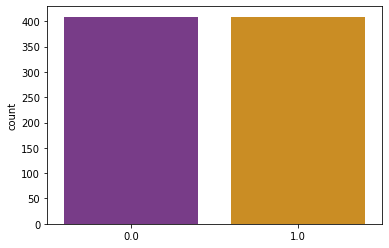

In [51]:
from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='CMRmap')

### Recursive Feature Elimination (RFE)

In [52]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

svc = SVC(kernel="linear")
lgr = LogisticRegression()

test=RFE

# Init, fit
rfecv = RFECV(
    estimator=lgr,
    min_features_to_select=5,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=StratifiedKFold(2),
)

_ = rfecv.fit(X_train, y_train)


In [53]:
X_train.columns[rfecv.support_]

Index(['EBITDA_to_total_Debt_1', 'Industry_Manufacture',
       'Industry_Services_ProfessionalSciTech',
       'Industry_Services_SupportAdmin', 'Industry_Wholesale'],
      dtype='object')

In [54]:
len(X_train.columns[rfecv.support_])

5

In [55]:
len(X_train.columns)

34

In [56]:
X_train.loc[ :, rfecv.support_]

,EBITDA_to_total_Debt_1,Industry_Manufacture,Industry_Services_ProfessionalSciTech,Industry_Services_SupportAdmin,Industry_Wholesale
295,-0.284177,0,0,0,0
566,0.008277,0,0,0,0
3,-0.265719,0,0,0,0
68,-0.268476,1,0,0,0
449,1.689369,0,0,0,0
...,...,...,...,...,...
129,-0.121592,1,0,0,0
144,-0.299818,0,0,0,0
72,-0.270873,0,0,0,0
235,-0.284257,0,0,0,0


In [57]:
X_train_rfecv = X_train.loc[ :, rfecv.support_]

In [58]:
X_test_rfecv = X_test.loc[ :, rfecv.support_]

In [59]:
#sv = SVC(kernel="linear")
#_ = sv.fit(X_train_rfecv, y_train)
lgr = LogisticRegression()
_ = lgr.fit(X_train_rfecv, y_train)

#print("Training R-sqaured:", sv.score(X_train_rfecv, y_train))
#print("Testing R-squared:",sv.score(X_test_rfecv, y_test))

print("Training R-sqaured:", lgr.score(X_train_rfecv, y_train))
print("Testing R-squared:",lgr.score(X_test_rfecv, y_test))

Training R-sqaured: 0.8930131004366813
Testing R-squared: 0.8869565217391304


In [60]:
#sv = SVC(kernel="linear")
#_ = sv.fit(X_train, y_train)

lgr = LogisticRegression()
_ = lgr.fit(X_train, y_train)

#print("Training R-sqaured:", sv.score(X_train, y_train))
#print("Testing R-squared:",sv.score(X_test, y_test))

print("Training R-sqaured:", lgr.score(X_train, y_train))
print("Testing R-squared:",lgr.score(X_test, y_test))

Training R-sqaured: 0.8951965065502183
Testing R-squared: 0.8956521739130435


### DecisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state = 20)
model_rfe = DecisionTreeClassifier(criterion='entropy', random_state = 25)
model_smote = DecisionTreeClassifier(criterion='entropy', random_state = 25)

model.fit(X_train, y_train)
model_rfe.fit(X_train_rfecv, y_train)
model_smote.fit(X_train_s, y_train_s)

DecisionTreeClassifier(criterion='entropy', random_state=25)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 295 to 37
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CASH_AND_CASH_EQUIVALENTS_floored1     458 non-null    float64
 1   COST_OF_GOODS_SOLD_1                   458 non-null    float64
 2   CURRENT_LIABILITIES_1                  458 non-null    float64
 3   DEPRECIATION_1                         458 non-null    float64
 4   GROSS_PROFIT_1                         458 non-null    float64
 5   NET_FIXED_ASSETS_1                     458 non-null    float64
 6   NET_INCOME_1                           458 non-null    float64
 7   NET_INTANGIBLES_1                      458 non-null    float64
 8   RETAINED_EARNINGS_1                    458 non-null    float64
 9   TOTAL_DEBT_1                           458 non-null    float64
 10  WORKING_CAPITAL_1                      458 non-null    float64
 11  Debt_

In [63]:
y_train_pred_DTC = model.predict(X_train)  

y_train_pred_DTC_rfecv = model_rfe.predict(X_train_rfecv)  


In [64]:
y_test_pred_DTC = model.predict(X_test)  

y_test_pred_DTC_rfecv = model_rfe.predict(X_test_rfecv)  

y_test_pred_DTC_smote=model_smote.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

print('DecisionTreeClassifier accuracy score for train data is:', 
      accuracy_score(y_train,y_train_pred_DTC))

print('DecisionTreeClassifier accuracy score for train data with RFE is:', 
      accuracy_score(y_train,y_train_pred_DTC_rfecv))


DecisionTreeClassifier accuracy score for train data is: 0.9978165938864629
DecisionTreeClassifier accuracy score for train data with RFE is: 0.982532751091703


In [66]:
print('DecisionTreeClassifier accuracy score for test data is:', 
      accuracy_score(y_test,y_test_pred_DTC))

print('DecisionTreeClassifier accuracy score for test data with RFE is:', 
      accuracy_score(y_test,y_test_pred_DTC_rfecv))

print('DecisionTreeClassifier accuracy score for test data with SMOTE is:', 
      accuracy_score(y_test,y_test_pred_DTC_smote))


DecisionTreeClassifier accuracy score for test data is: 0.9826086956521739
DecisionTreeClassifier accuracy score for test data with RFE is: 0.9478260869565217
DecisionTreeClassifier accuracy score for test data with SMOTE is: 0.9739130434782609


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       102
         1.0       0.86      0.92      0.89        13

    accuracy                           0.97       115
   macro avg       0.92      0.95      0.94       115
weighted avg       0.98      0.97      0.97       115



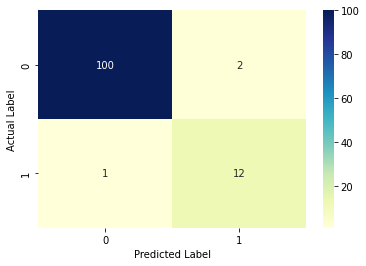

In [67]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score
cnf_matrix = confusion_matrix(y_test, y_test_pred_DTC_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_test_pred_DTC_smote))

In [68]:
DTC_metric=[]
DTC_metric.append(accuracy_score(y_train,y_train_pred_DTC))
DTC_metric.append(accuracy_score(y_test,y_test_pred_DTC))
DTC_metric.append(accuracy_score(y_test,y_test_pred_DTC_smote))

DTC_metric

[0.9978165938864629, 0.9826086956521739, 0.9739130434782609]

In [69]:
model_metric = pd.DataFrame(index=(['Train_Acc','Test_Acc', 'Test_SMOTE_Acc']))
model_metric['DecisionTreeClassifier']=DTC_metric
model_metric

,DecisionTreeClassifier
Train_Acc,0.997817
Test_Acc,0.982609
Test_SMOTE_Acc,0.973913


### Ploting Precision Recall curve

Text(0.5, 1.0, 'Precision Recall Curve_DTC')

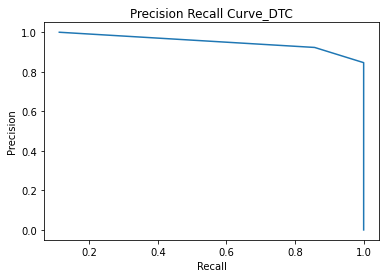

In [70]:
y_pred_prob_DTC_smote = model_smote.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_DTC_smote)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve_DTC')

### Ploting AUROC Curve

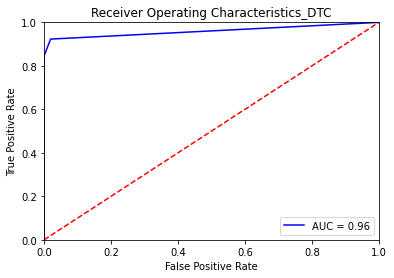

In [71]:
from sklearn.metrics import roc_curve, auc
probs_DTC = model_smote.predict_proba(X_test)
preds_DTC = probs_DTC[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_DTC)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristics_DTC")
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], "r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### RandomForestClassifier

In [72]:
# Instantiate a decision tree classifier
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier

clf = RandomForestClassifier(random_state=190, class_weight='balanced')
clf.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_RFC = clf.predict(X_train)
y_test_pred_RFC = clf.predict(X_test)

clf_rfe = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_rfe.fit(X_train_rfecv, y_train)

y_train_pred_rfecv_RFC = clf_rfe.predict(X_train_rfecv)  
y_test_pred_rfecv_RFC = clf_rfe.predict(X_test_rfecv) 


clf_smote = RandomForestClassifier(random_state=91, class_weight='balanced')
clf_smote.fit(X_train_s, y_train_s)
y_test_pred_RFC_smote=clf_smote.predict(X_test)


In [73]:
print('RandomForestClassifier accuracy score for train data is:', 
      accuracy_score(y_train,y_train_pred_RFC))

print('RandomForestClassifier accuracy score for train data is:', 
      accuracy_score(y_train,y_train_pred_rfecv_RFC))


RandomForestClassifier accuracy score for train data is: 0.9978165938864629
RandomForestClassifier accuracy score for train data is: 0.9585152838427947


In [74]:
print('RandomForestClassifier accuracy score for test data is:', 
      accuracy_score(y_test,y_test_pred_RFC))

print('RandomForestClassifier accuracy score for test data with RFE is:', 
      accuracy_score(y_test,y_test_pred_rfecv_RFC))

print('RandomForestClassifier accuracy score for test data with SMOTE is:', 
      accuracy_score(y_test,y_test_pred_RFC_smote))


RandomForestClassifier accuracy score for test data is: 0.9739130434782609
RandomForestClassifier accuracy score for test data with RFE is: 0.9739130434782609
RandomForestClassifier accuracy score for test data with SMOTE is: 0.9739130434782609


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       102
         1.0       0.86      0.92      0.89        13

    accuracy                           0.97       115
   macro avg       0.92      0.95      0.94       115
weighted avg       0.98      0.97      0.97       115



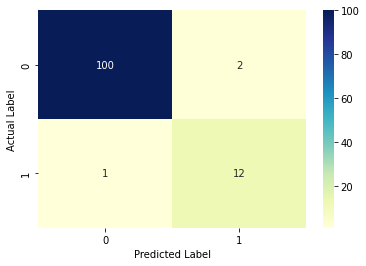

In [75]:
cnf_matrix = confusion_matrix(y_test, y_test_pred_RFC_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_test_pred_RFC_smote))

In [76]:
RFC_metric=[]
RFC_metric.append(accuracy_score(y_train,y_train_pred_RFC))
RFC_metric.append(accuracy_score(y_test,y_test_pred_RFC))
RFC_metric.append(accuracy_score(y_test,y_test_pred_RFC_smote))

model_metric['RandomForestClassifier']=RFC_metric
model_metric

,DecisionTreeClassifier,RandomForestClassifier
Train_Acc,0.997817,0.997817
Test_Acc,0.982609,0.973913
Test_SMOTE_Acc,0.973913,0.973913


### Ploting Precision Recall curve

Text(0.5, 1.0, 'Precision Recall Curve_RFC')

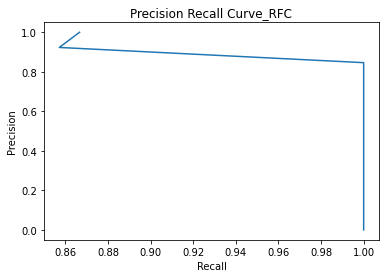

In [77]:
y_pred_prob_RFC_smote = clf_smote.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_RFC_smote)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve_RFC')

### Ploting AUROC Curve

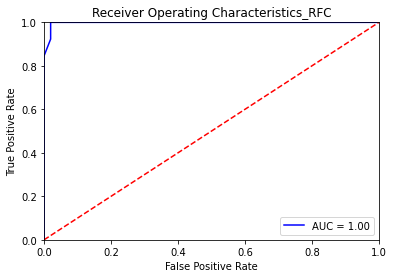

In [78]:
from sklearn.metrics import roc_curve, auc
probs_RFC = clf_smote.predict_proba(X_test)
preds_RFC = probs_RFC[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_RFC)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristics_RFC")
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], "r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### RandomForestClassifier with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from scipy.stats import randint as sp_randint                       # For initializing random integer values
from sklearn.model_selection import GridSearchCV             # To find best hyperparamter setting for the algorithm



param_dist = {"max_depth": range(2,20),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }

# Run randomized search
random_search = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_RSCV_RFC = random_search.predict(X_train)
y_test_pred_RSCV_RFC = random_search.predict(X_test)


# Run randomized search using RFE
random_search_rfecv = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   n_jobs=-1)
random_search_rfecv.fit(X_train_rfecv, y_train)

y_train_pred_rfecv_RSCV_RFC = random_search_rfecv.predict(X_train_rfecv)  
y_test_pred_rfecv_RSCV_RFC = random_search_rfecv.predict(X_test_rfecv) 



# Run randomized search using SMOTE
random_search_smote = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   n_jobs=-1)
random_search_smote.fit(X_train_rfecv, y_train)
random_search_smote.fit(X_train_s, y_train_s)

y_test_pred_RSCV_RFC_smote=random_search_smote.predict(X_test)

In [ ]:
print('RandmomizedCV RandomForestClassifier accuracy score for train data is:', 
      accuracy_score(y_train,y_train_pred_RSCV_RFC))

print('RandmomizedCV RandomForestClassifier accuracy score for train data with RFE is:', 
      accuracy_score(y_train,y_train_pred_rfecv_RSCV_RFC))


In [ ]:
print('RandmomizedCV RandomForestClassifier accuracy score for test data is:', 
      accuracy_score(y_test,y_test_pred_RSCV_RFC))

print('RandmomizedCV RandomForestClassifier accuracy score for test data with RFE is:', 
      accuracy_score(y_test,y_test_pred_rfecv_RSCV_RFC))

print('RandmomizedCV RandomForestClassifier accuracy score for test data with SMOTE is:', 
      accuracy_score(y_test,y_test_pred_RSCV_RFC_smote))


In [ ]:
random_search.best_estimator_

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_test_pred_RSCV_RFC_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_test_pred_RSCV_RFC_smote))

In [ ]:
RSCV_RFC_metric=[]
RSCV_RFC_metric.append(accuracy_score(y_train,y_train_pred_RSCV_RFC))
RSCV_RFC_metric.append(accuracy_score(y_test,y_test_pred_RSCV_RFC))
RSCV_RFC_metric.append(accuracy_score(y_test,y_test_pred_RSCV_RFC_smote))

model_metric['RandomizedCV_RFC']=RSCV_RFC_metric
model_metric

### Ploting Precision Recall curve

In [ ]:
y_pred_prob_RSCV_RFC_smote = random_search_smote.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_RSCV_RFC_smote)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve_RSCV_RFC')

### Ploting AUROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
probs_RSCV_RFC = random_search_smote.predict_proba(X_test)
preds_RSCV_RFC = probs_RSCV_RFC[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_RSCV_RFC)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristics_RSCV_RFC")
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], "r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [ ]:
tpr

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, y_train)

y_test_pred_KNN = classifier.predict(X_test)
y_train_pred_KNN =classifier.predict(X_train)

In [ ]:
classifier_RFE = KNeighborsClassifier(n_neighbors=7)  
classifier_RFE.fit(X_train_rfecv, y_train)

y_test_pred_RFE_KNN = classifier_RFE.predict(X_test_rfecv)
y_train_pred_RFE_KNN =classifier_RFE.predict(X_train_rfecv)


In [ ]:
classifier_smote = KNeighborsClassifier(n_neighbors=7)  
classifier_smote.fit(X_train_s, y_train_s)

y_test_pred_KNN_smote = classifier_smote.predict(X_test)


In [ ]:
print('KNN accuracy score for train data is:', accuracy_score(y_train,y_train_pred_KNN))

print('KNN accuracy score for train data with RFE is:', accuracy_score(y_train,y_train_pred_RFE_KNN))

In [ ]:
print('KNN accuracy score for test data is:', accuracy_score(y_test,y_test_pred_KNN))

print('KNN accuracy score for test data with RFE is:', accuracy_score(y_test,y_test_pred_RFE_KNN))

print('KNN accuracy score for test data with SMOTE is:', accuracy_score(y_test,y_test_pred_KNN_smote))


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_test_pred_KNN_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_test_pred_KNN_smote))

In [ ]:
KNN_metric=[]
KNN_metric.append(accuracy_score(y_train,y_train_pred_KNN))
KNN_metric.append(accuracy_score(y_test,y_test_pred_KNN))
KNN_metric.append(accuracy_score(y_test,y_test_pred_KNN_smote))

model_metric['KNN']=KNN_metric
model_metric

### Ploting Precision Recall curve

In [ ]:
y_pred_prob_KNN_smote = model_smote.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_KNN_smote)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve_KNN')

### Ploting AUROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
probs_KNN = classifier_smote.predict_proba(X_test)
preds_KNN = probs_KNN[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_KNN)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristics_KNN")
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], "r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()